In [106]:
#Install packaged from here if needed
#! pip install notebook
#! pip install newsapi
#! pip install newsapi-python
#! pip install pandas
#! pip install numpy
#! pip install numpy==1.19.3
#! pip install yfinance
#! pip install vaderSentiment
#! pip install nltk
#! pip install sklearn
#! pip install matplotlib
#! pip install xgboost
#! pip install seaborn
#! pip install pandas
#! pip install numpy
#! pip install numpy==1.19.3


In [179]:
import pandas as pd
import numpy as np
import datetime
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot
#from pandas import read_csv, set_option
from pandas import Series, datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
from xgboost import XGBClassifier
import seaborn as sns
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

c:\users\sahil\anaconda3\envs\cse6242\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [180]:
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [181]:
#!pip install nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

    Load Data

In [182]:
df_tickers = pd.read_csv("Ticker_Values.csv") ##File to read coressponding to name

In [183]:
df_news=pd.read_csv('stocks_news.csv')

In [184]:
df_news_new = pd.read_csv("stocks_news_newformat.csv")

    Clean data by dropping duplicates

In [185]:
df_tickers=df_tickers.drop_duplicates()

In [186]:
df_news=df_news.drop_duplicates()

View Data

In [187]:
df_news

,ticker,publishedAt,content,url,description,title
0,ROK,2020-11-10T13:30:50Z,Awaria sierpniowa\nZanim doszło do najnowszego...,https://antyweb.pl/kolejna-katastrofa-rok-2020...,2020 r. na pewnie nie będą z rozrzewnieniem ws...,Kolejna katastrofa w Arecibo. Rok 2020 nie osz...
1,ROK,2020-11-10T17:30:31Z,"Nowe technologie ekscytują, przyciągają uwagę ...",https://antyweb.pl/5g-czy-jest-sie-czym-ekscyt...,Rok 2020 był zdecydowanie rokiem 5G. Jednak z ...,"Chciałbym, by ten szał na 5G się już skończył"
2,ROK,2020-11-09T12:30:07Z,Koniec roku to czas podsumowań. Jest to moment...,https://antyweb.pl/wasz-wybor-2020/,2020 zbliża się ku końcowi. Warto więc spojrze...,"Jaka jest wasza ulubiona aplikacja, gra, film ..."
3,ROK,2020-11-09T17:27:37Z,"ycie istnieje tylko na Ziemi, bo tylko tu wyst...",https://spidersweb.pl/2020/11/bakterie-w-kosmo...,"Życie istnieje tylko na Ziemi, bo tylko tu wys...",Bakterie znalezione w mięsie spędziły rok w pr...
4,ROK,2020-11-10T18:43:36Z,Apple Silicon M1 to pierwszy w historii Applea...,https://spidersweb.pl/2020/11/apple-silicon-m1...,Apple Silicon M1 to pierwszy w historii Apple’...,"Poznajcie M1. Nowe serce komputerów Mac, zapro..."
...,...,...,...,...,...,...
7514,CHTR,2020-10-21T22:53:26Z,While the market driven by short-term sentimen...,https://finance.yahoo.com/news/were-hedge-fund...,While the market driven by short-term sentimen...,Were Hedge Funds Right About Shopify Inc (SHOP)?
7515,CHTR,2020-10-20T16:05:38Z,Is Union Pacific Corporation (NYSE:UNP) a good...,https://finance.yahoo.com/news/were-hedge-fund...,Is Union Pacific Corporation (NYSE:UNP) a good...,Were Hedge Funds Right About Crowding Union Pa...
7516,CHTR,2020-10-26T16:09:13Z,How do you pick the next stock to invest in? O...,https://finance.yahoo.com/news/smart-money-lin...,How do you pick the next stock to invest in? O...,Was The Smart Money Right About Linde plc (LIN)?
7517,CHTR,2020-10-27T02:45:23Z,Our extensive research has shown that imitatin...,https://finance.yahoo.com/news/were-hedge-fund...,Our extensive research has shown that imitatin...,Were These Hedge Funds Right About Warming Up ...


In [188]:
df_news[df_news['ticker']=='ROK']

,ticker,publishedAt,content,url,description,title
0,ROK,2020-11-10T13:30:50Z,Awaria sierpniowa\nZanim doszło do najnowszego...,https://antyweb.pl/kolejna-katastrofa-rok-2020...,2020 r. na pewnie nie będą z rozrzewnieniem ws...,Kolejna katastrofa w Arecibo. Rok 2020 nie osz...
1,ROK,2020-11-10T17:30:31Z,"Nowe technologie ekscytują, przyciągają uwagę ...",https://antyweb.pl/5g-czy-jest-sie-czym-ekscyt...,Rok 2020 był zdecydowanie rokiem 5G. Jednak z ...,"Chciałbym, by ten szał na 5G się już skończył"
2,ROK,2020-11-09T12:30:07Z,Koniec roku to czas podsumowań. Jest to moment...,https://antyweb.pl/wasz-wybor-2020/,2020 zbliża się ku końcowi. Warto więc spojrze...,"Jaka jest wasza ulubiona aplikacja, gra, film ..."
3,ROK,2020-11-09T17:27:37Z,"ycie istnieje tylko na Ziemi, bo tylko tu wyst...",https://spidersweb.pl/2020/11/bakterie-w-kosmo...,"Życie istnieje tylko na Ziemi, bo tylko tu wys...",Bakterie znalezione w mięsie spędziły rok w pr...
4,ROK,2020-11-10T18:43:36Z,Apple Silicon M1 to pierwszy w historii Applea...,https://spidersweb.pl/2020/11/apple-silicon-m1...,Apple Silicon M1 to pierwszy w historii Apple’...,"Poznajcie M1. Nowe serce komputerów Mac, zapro..."
...,...,...,...,...,...,...
3635,ROK,2020-11-16T12:00:14Z,Ostatni kwartał upłynął w Grupie Cyfrowy Polsa...,https://antyweb.pl/cyfrowy-polsat-wyniki/,W minionym tygodniu Grupa Cyfrowy Polsat podzi...,Po przejęciu Interii liczba odsłon serwisów Cy...
3637,ROK,2020-11-16T09:00:55Z,Koniec darmowej nielimitowanej przestrzeni w Z...,https://antyweb.pl/jak-pobrac-wszystkie-zdjeci...,Wiadomość o wycofaniu darmowego planu na nieli...,Jak pobrać wszystkie fotki ze Zdjęć Google? Ja...
3641,ROK,2020-11-16T08:58:53Z,"Dwa niezalene róda podzieliy si informacj, e S...",https://spidersweb.pl/2020/11/samsung-note-202...,Dwa niezależne źródła podzieliły się informacj...,Samsung może porzucić serię Note. Czas na rozw...
3645,ROK,2020-11-16T09:35:20Z,Image via LEGOWhile you can’t currently travel...,https://designtaxi.com/news/412342/LEGO-s-9-03...,Image via LEGO\n\nWhile you can’t currently tr...,"LEGO’s 9,036-Piece Model Of Rome’s Colosseum I..."


In [189]:
df_tickers

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,2020-01-02,73.552572,74.635108,73.291874,74.573036,135480400.0,0.0,0.0,AAPL
1,2020-01-03,73.778510,74.630133,73.617125,73.848030,146322800.0,0.0,0.0,AAPL
2,2020-01-06,72.944270,74.476197,72.686049,74.436470,118387200.0,0.0,0.0,AAPL
3,2020-01-07,74.446407,74.709591,73.860453,74.086395,108872000.0,0.0,0.0,AAPL
4,2020-01-08,73.780989,75.588519,73.780989,75.278160,132079200.0,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...,...
1273043,2020-11-18,39.959999,40.130001,39.105000,39.209999,686503.0,0.0,0.0,ZION
1273044,2020-11-17,164.490005,166.110001,164.070007,165.429993,1214300.0,0.0,0.0,ZTS
1273045,2020-11-18,165.100006,166.330002,163.600006,164.179993,671778.0,0.0,0.0,ZTS
1273046,2020-11-17,359.970001,361.920013,358.339996,360.619995,65852300.0,0.0,0.0,SPY


In [190]:
df_news_new['url']="ss"
df_news_new['content']=df_news_new['text']
df_news_new['publishedAt']=df_news_new['Date']
df_news_new=df_news_new.drop(['text','Date'], axis=1)
df_news_new = df_news_new[['ticker','publishedAt','content','url','description','title']]
frames = [df_news_new, df_news]
result = pd.concat(frames)
df_news=result

In [191]:
df_news

,ticker,publishedAt,content,url,description,title
0,MMM,2020-10-23,【レビュー】音楽配信とCD再生を同等クオリティで、新世代マランツ「30シリーズ」の凄さ. V...,ss,家でのリモートワーク。仕事中なのでマズいなと思いつつ、ついradikoでラジオ流したり、Yo...,【レビュー】音楽配信とCD再生を同等クオリティで、新世代マランツ「30シリーズ」の凄さ. V...
1,MMM,2020-10-26,How To Invest For Big Gains In High-Growth Str...,ss,"We discuss two high-growth strategies, includi...",How To Invest For Big Gains In High-Growth Str...
2,MMM,2020-10-27,"Donald Trump: Did He Bring a ""Fake Melania"" Bo...",ss,Donald Trump has been accused of bringing a Me...,"Donald Trump: Did He Bring a ""Fake Melania"" Bo..."
3,MMM,2020-10-28,Realtor fired after telling Black YouTuber he’...,ss,A realtor in Arizona was reportedly fired and ...,Realtor fired after telling Black YouTuber he’...
4,MMM,2020-10-29,MGMA Adds New Vice President of Marketing to E...,ss,Victoria Stone has joined the Medical Group Ma...,MGMA Adds New Vice President of Marketing to E...
...,...,...,...,...,...,...
7514,CHTR,2020-10-21T22:53:26Z,While the market driven by short-term sentimen...,https://finance.yahoo.com/news/were-hedge-fund...,While the market driven by short-term sentimen...,Were Hedge Funds Right About Shopify Inc (SHOP)?
7515,CHTR,2020-10-20T16:05:38Z,Is Union Pacific Corporation (NYSE:UNP) a good...,https://finance.yahoo.com/news/were-hedge-fund...,Is Union Pacific Corporation (NYSE:UNP) a good...,Were Hedge Funds Right About Crowding Union Pa...
7516,CHTR,2020-10-26T16:09:13Z,How do you pick the next stock to invest in? O...,https://finance.yahoo.com/news/smart-money-lin...,How do you pick the next stock to invest in? O...,Was The Smart Money Right About Linde plc (LIN)?
7517,CHTR,2020-10-27T02:45:23Z,Our extensive research has shown that imitatin...,https://finance.yahoo.com/news/were-hedge-fund...,Our extensive research has shown that imitatin...,Were These Hedge Funds Right About Warming Up ...


    Data Pre-Processing

In [192]:
df_news['title'] = df_news['title'].astype('unicode')
df_news['description'] = df_news['title'].astype('unicode')
df_news['content'] = df_news['content'].astype('unicode')
cs = []
for row in range(len(df_news)):
    cs.append(analyzer.polarity_scores(df_news['title'].iloc[row])['compound'])
df_news['compound_vader_score'] = cs
#df_merge = df_merge[(df_merge[['compound_vader_score']] != 0).all(axis=1)].reset_index(drop=True)

cs = []
for row in range(len(df_news)):
    cs.append(analyzer.polarity_scores(df_news['description'].iloc[row])['compound'])

df_news['compound_vader_score_desc'] = cs
#df_news = df_news[(df_news[['compound_vader_score_desc']] != 0).all(axis=1)].reset_index(drop=True)

cs = []
for row in range(len(df_news)):
    cs.append(analyzer.polarity_scores(df_news['content'].iloc[row])['compound'])

df_news['compound_vader_score_content'] = cs
#df_news = df_news[(df_news[['compound_vader_score_content']] != 0).all(axis=1)].reset_index(drop=True)


In [193]:
df_news['publishedAt'] = pd.to_datetime(df_news['publishedAt'], errors='coerce')
df_news['Date']=pd.to_datetime(df_news['publishedAt'], errors='coerce',utc=True).dt.strftime('%Y-%m-%d')

In [194]:
df_news=df_news.drop(['content','description','title','url','publishedAt'], axis=1)

In [195]:
df_news[df_news['ticker']=='ROK']

,ticker,compound_vader_score,compound_vader_score_desc,compound_vader_score_content,Date
0,ROK,0.0000,0.0000,-0.5574,2020-11-10
1,ROK,0.0000,0.0000,0.0000,2020-11-10
2,ROK,0.0000,0.0000,0.0000,2020-11-09
3,ROK,0.0000,0.0000,0.0000,2020-11-09
4,ROK,0.0000,0.0000,0.0000,2020-11-10
...,...,...,...,...,...
3635,ROK,-0.5574,-0.5574,0.0000,2020-11-16
3637,ROK,0.0000,0.0000,0.0000,2020-11-16
3641,ROK,0.0000,0.0000,0.0000,2020-11-16
3645,ROK,0.0000,0.0000,0.4939,2020-11-16


In [196]:
df_news['max_cvs']=df_news.groupby(['Date','ticker'])['compound_vader_score'].transform('max')
df_news['min_cvs']=df_news.groupby(['Date','ticker'])['compound_vader_score'].transform('min')

df_news['max_cvsd']=df_news.groupby(['Date','ticker'])['compound_vader_score_desc'].transform('max')
df_news['min_cvsd']=df_news.groupby(['Date','ticker'])['compound_vader_score_desc'].transform('min')

df_news['max_cvsc']=df_news.groupby(['Date','ticker'])['compound_vader_score_content'].transform('max')
df_news['min_cvsc']=df_news.groupby(['Date','ticker'])['compound_vader_score_content'].transform('min')


In [197]:
df_news.head()

,ticker,compound_vader_score,compound_vader_score_desc,compound_vader_score_content,Date,max_cvs,min_cvs,max_cvsd,min_cvsd,max_cvsc,min_cvsc
0,MMM,0.0000,0.0000,0.6062,2020-10-23,0.0000,0.0000,0.0000,0.0000,0.6062,0.6062
1,MMM,0.6868,0.6868,0.6641,2020-10-26,0.6868,0.6868,0.6868,0.6868,0.6641,0.6641
2,MMM,0.1027,0.1027,0.9127,2020-10-27,0.1027,0.1027,0.1027,0.1027,0.9127,0.9127
3,MMM,-0.6597,-0.6597,-0.8860,2020-10-28,-0.6597,-0.6597,-0.6597,-0.6597,-0.8860,-0.8860
4,MMM,0.0000,0.0000,0.5267,2020-10-29,0.0000,0.0000,0.0000,0.0000,0.5267,0.5267


In [198]:
df_news['final_cvs']=df_news['max_cvs']+df_news['min_cvs']
df_news['final_cvsd']=df_news['max_cvsd']+df_news['min_cvsd']
df_news['final_cvsc']=df_news['max_cvsc']+df_news['min_cvsc']

In [199]:
df_news=df_news.drop(['compound_vader_score','compound_vader_score_desc','compound_vader_score_content','max_cvs','min_cvs'
                     ,'max_cvsd','min_cvsd','max_cvsc','min_cvsc'], axis=1)

In [200]:
df_news.head()

,ticker,Date,final_cvs,final_cvsd,final_cvsc
0,MMM,2020-10-23,0.0000,0.0000,1.2124
1,MMM,2020-10-26,1.3736,1.3736,1.3282
2,MMM,2020-10-27,0.2054,0.2054,1.8254
3,MMM,2020-10-28,-1.3194,-1.3194,-1.7720
4,MMM,2020-10-29,0.0000,0.0000,1.0534


In [201]:
df_news=df_news.drop_duplicates()
df_news=df_news.reset_index(drop=True)
df_final_news=df_news.sort_values(by=['ticker','Date'])

In [202]:
vader_Signal=[]
for i in range(len(df_news)):
    if df_news['final_cvs'].values[i] > 0.25:        
        vader_Signal.append([df_news['ticker'].iloc[i],"Buy",df_news['Date'].iloc[i]])
    elif df_news['final_cvs'].values[i] < -0.25:       
        vader_Signal.append([df_news['ticker'].iloc[i],"Sell",df_news['Date'].iloc[i]])
df_Signal=pd.DataFrame(vader_Signal,columns =['stock','signal','up_date'])
df_Signal=df_Signal.sort_values(by=['up_date','stock','signal'], ascending=True)
df_Signal.drop_duplicates(subset =["up_date","stock","signal"], 
                     keep = False, inplace = True) 
df_Signal=df_Signal.sort_values(by=['up_date','stock','signal'], ascending=True)
df_tickers_filter=df_tickers[df_tickers.Date >'2020-10-18']
df_merge = pd.merge(df_Signal, df_tickers_filter, right_on=['Ticker','Date'], left_on=['stock','up_date'],how='outer')
df_tickers_filter=df_tickers[df_tickers.Date >'2020-10-18']
df_merge=df_merge.drop(['Open','High','Low','up_date','Dividends','Stock Splits','stock'], axis=1)
values = {'signal': "Hold"}
df_merge=df_merge.fillna(value=values)
df_merge['stock']=df_merge['Ticker']
df_merge['up_date']=df_merge['Date']
df_merge.to_csv('Stock_Signals.csv',mode='a', index=False)

In [203]:
df_final_news.reset_index(drop=True)

,ticker,Date,final_cvs,final_cvsd,final_cvsc
0,A,2020-10-23,0.8808,0.8808,1.9392
1,A,2020-10-26,1.3194,1.3194,1.9804
2,A,2020-10-30,1.2248,1.2248,1.9352
3,A,2020-11-02,0.0000,0.0000,1.9332
4,A,2020-11-03,-0.6824,-0.6824,0.7612
...,...,...,...,...,...
5171,ZM,2020-11-11,0.0000,0.0000,1.7182
5172,ZM,2020-11-12,-0.8808,-0.8808,0.8430
5173,ZM,2020-11-13,0.0000,0.0000,0.0000
5174,ZM,2020-11-16,1.6542,1.6542,1.9546


In [204]:
df_tickers['Percent_Change']=(df_tickers['Open']-df_tickers['Close'])

In [205]:
df_tickers['Percent_Change_Actual']=(df_tickers['Open']-df_tickers['Close'])/df_tickers['Open']

In [206]:
df_tickers['Percent_Change'] = np.sign(df_tickers['Percent_Change'])

In [207]:
df_tickers['2_SMA'] = df_tickers['Close'].rolling(window=3).mean()
df_tickers['5_SMA'] = df_tickers['Close'].rolling(window=5).mean()
df_tickers = df_tickers[df_tickers['5_SMA'].notna()]
df_tickers = df_tickers[df_tickers['2_SMA'].notna()]

In [208]:
df_tickers.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Percent_Change,Percent_Change_Actual,2_SMA,5_SMA
4,2020-01-08,73.780989,75.588519,73.780989,75.278160,132079200.0,0.0,0.0,AAPL,-1.0,-0.020292,74.600342,74.444418
5,2020-01-09,76.283726,77.075763,76.025513,76.877136,170108400.0,0.0,0.0,AAPL,-1.0,-0.007779,75.413897,74.905238
6,2020-01-10,77.117969,77.631925,76.534492,77.050926,140644800.0,0.0,0.0,AAPL,1.0,0.000869,76.402074,75.545818
7,2020-01-13,77.376193,78.724390,77.254527,78.697075,121532000.0,0.0,0.0,AAPL,-1.0,-0.017071,77.541712,76.397939
8,2020-01-14,78.632526,78.848535,77.507786,77.634407,161954400.0,0.0,0.0,AAPL,1.0,0.012693,77.794136,77.107541


In [209]:
df_merge = pd.merge(df_final_news, df_tickers, left_on=['ticker','Date'], right_on=['Ticker','Date'])

In [210]:
df_merge=df_merge.drop(['Ticker'], axis=1)

Joined Both datasets
new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])


In [211]:
print(df_merge.describe())

         final_cvs   final_cvsd   final_cvsc         Open         High  \
count  5466.000000  5466.000000  5466.000000  5466.000000  5466.000000   
mean      0.229675     0.229675     0.509722   151.530284   153.695867   
std       0.790657     0.790657     1.100186   285.080367   289.078465   
min      -1.996200    -1.996200    -1.999600     5.200000     5.400000   
25%       0.000000     0.000000     0.000000    41.469999    42.457500   
50%       0.000000     0.000000     0.592000    89.460003    90.465000   
75%       0.784325     0.784325     1.530000   159.658582   162.740002   
max       1.986600     1.986600     1.998000  4290.000000  4424.950195   

               Low        Close        Volume    Dividends  Stock Splits  \
count  5466.000000  5466.000000  5.466000e+03  5466.000000   5466.000000   
mean    149.080868   151.134958  6.057251e+06     0.006890      0.001931   
std     280.746975   284.573141  1.391606e+07     0.129591      0.080416   
min       5.110000     5.3400

    # Visualized Data

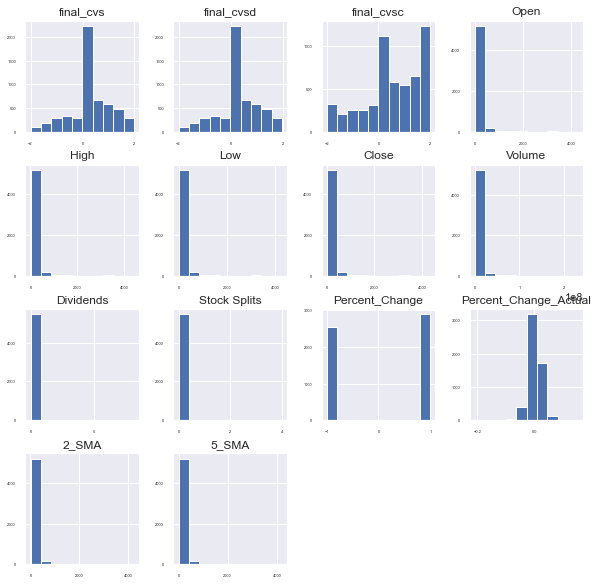

In [212]:
sns.set()
df_merge.hist(sharex = False, sharey = False, xlabelsize = 4, ylabelsize = 4, figsize=(10, 10))
pyplot.show()

<AxesSubplot:>

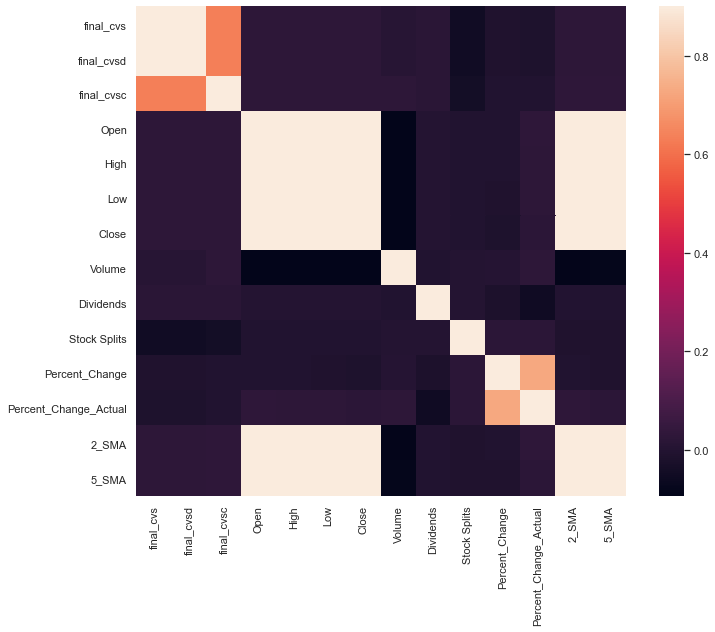

In [213]:
corrmat = df_merge.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [214]:
df_merge=df_merge.drop(['Open','High','Low','Close','Percent_Change_Actual'], axis=1)

In [215]:
df_merge

,ticker,Date,final_cvs,final_cvsd,final_cvsc,Volume,Dividends,Stock Splits,Percent_Change,2_SMA,5_SMA
0,A,2020-10-23,0.8808,0.8808,1.9392,833900.0,0.0,0.0,1.0,105.923332,105.773999
1,A,2020-10-26,1.3194,1.3194,1.9804,1102000.0,0.0,0.0,1.0,105.856664,105.601999
2,A,2020-10-30,1.2248,1.2248,1.9352,2310000.0,0.0,0.0,-1.0,101.923332,78.103999
3,A,2020-11-02,0.0000,0.0000,1.9332,1572300.0,0.0,0.0,-1.0,103.116664,90.847999
4,A,2020-11-03,-0.6824,-0.6824,0.7612,1175000.0,0.0,0.0,-1.0,104.786664,103.607999
...,...,...,...,...,...,...,...,...,...,...,...
5461,ZM,2020-10-21,0.0000,0.0000,0.0000,9215400.0,0.0,0.0,1.0,539.516683,542.790015
5462,ZM,2020-10-22,0.7870,0.7870,1.4294,8100900.0,0.0,0.0,1.0,523.583333,539.618005
5463,ZM,2020-10-23,-0.9534,-0.9534,-0.9534,5377100.0,0.0,0.0,1.0,515.083323,530.122003
5464,ZM,2020-10-26,0.0000,0.0000,0.0000,10080800.0,0.0,0.0,1.0,516.616648,520.011993


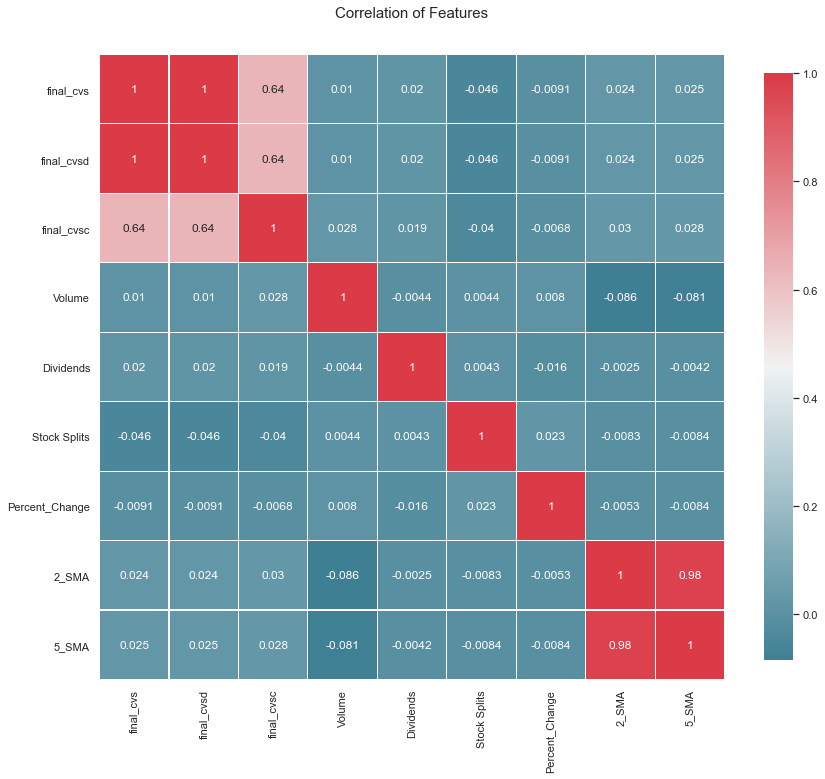

In [216]:
#correlation heatmap of dataset
#https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )    
    plt.title('Correlation of Features', y=1.05, size=15)
correlation_heatmap(df_merge)

    Modeling

In [217]:
df_final_merge=df_merge

In [218]:
df_final_merge

,ticker,Date,final_cvs,final_cvsd,final_cvsc,Volume,Dividends,Stock Splits,Percent_Change,2_SMA,5_SMA
0,A,2020-10-23,0.8808,0.8808,1.9392,833900.0,0.0,0.0,1.0,105.923332,105.773999
1,A,2020-10-26,1.3194,1.3194,1.9804,1102000.0,0.0,0.0,1.0,105.856664,105.601999
2,A,2020-10-30,1.2248,1.2248,1.9352,2310000.0,0.0,0.0,-1.0,101.923332,78.103999
3,A,2020-11-02,0.0000,0.0000,1.9332,1572300.0,0.0,0.0,-1.0,103.116664,90.847999
4,A,2020-11-03,-0.6824,-0.6824,0.7612,1175000.0,0.0,0.0,-1.0,104.786664,103.607999
...,...,...,...,...,...,...,...,...,...,...,...
5461,ZM,2020-10-21,0.0000,0.0000,0.0000,9215400.0,0.0,0.0,1.0,539.516683,542.790015
5462,ZM,2020-10-22,0.7870,0.7870,1.4294,8100900.0,0.0,0.0,1.0,523.583333,539.618005
5463,ZM,2020-10-23,-0.9534,-0.9534,-0.9534,5377100.0,0.0,0.0,1.0,515.083323,530.122003
5464,ZM,2020-10-26,0.0000,0.0000,0.0000,10080800.0,0.0,0.0,1.0,516.616648,520.011993


In [219]:
from sklearn.preprocessing import LabelEncoder
col = ['ticker']
# process columns, apply LabelEncoder to categorical features
lbl = LabelEncoder() 
#print(df_final_merge[cols])
#lbl.fit(list(df_final_merge[c].values)) 
clfs = {c:LabelEncoder() for c in col}
#print(clfs)
for col, clf in clfs.items():
    df_final_merge[col] = clfs[col].fit_transform(df_final_merge[col])

In [220]:
df_final_merge

,ticker,Date,final_cvs,final_cvsd,final_cvsc,Volume,Dividends,Stock Splits,Percent_Change,2_SMA,5_SMA
0,0,2020-10-23,0.8808,0.8808,1.9392,833900.0,0.0,0.0,1.0,105.923332,105.773999
1,0,2020-10-26,1.3194,1.3194,1.9804,1102000.0,0.0,0.0,1.0,105.856664,105.601999
2,0,2020-10-30,1.2248,1.2248,1.9352,2310000.0,0.0,0.0,-1.0,101.923332,78.103999
3,0,2020-11-02,0.0000,0.0000,1.9332,1572300.0,0.0,0.0,-1.0,103.116664,90.847999
4,0,2020-11-03,-0.6824,-0.6824,0.7612,1175000.0,0.0,0.0,-1.0,104.786664,103.607999
...,...,...,...,...,...,...,...,...,...,...,...
5461,338,2020-10-21,0.0000,0.0000,0.0000,9215400.0,0.0,0.0,1.0,539.516683,542.790015
5462,338,2020-10-22,0.7870,0.7870,1.4294,8100900.0,0.0,0.0,1.0,523.583333,539.618005
5463,338,2020-10-23,-0.9534,-0.9534,-0.9534,5377100.0,0.0,0.0,1.0,515.083323,530.122003
5464,338,2020-10-26,0.0000,0.0000,0.0000,10080800.0,0.0,0.0,1.0,516.616648,520.011993


In [221]:
df_final_merge['Date']=pd.to_datetime(df_final_merge['Date'], errors='coerce',utc=True).dt.strftime('%Y%m%d')

In [222]:
df_final_merge['Date']=df_final_merge['Date'].astype('int64') 

In [152]:
df_final_merge

,ticker,Date,final_cvs,final_cvsd,final_cvsc,Volume,Dividends,Stock Splits,Percent_Change,2_SMA,5_SMA
0,0,20201023,0.8808,0.8808,1.9392,833900.0,0.0,0.0,1.0,105.923332,105.773999
1,0,20201026,1.3194,1.3194,1.9804,1102000.0,0.0,0.0,1.0,105.856664,105.601999
2,0,20201030,1.2248,1.2248,1.9352,2310000.0,0.0,0.0,-1.0,101.923332,78.103999
3,0,20201102,0.0000,0.0000,1.9332,1572300.0,0.0,0.0,-1.0,103.116664,90.847999
4,0,20201103,-0.6824,-0.6824,0.7612,1175000.0,0.0,0.0,-1.0,104.786664,103.607999
...,...,...,...,...,...,...,...,...,...,...,...
5461,338,20201021,0.0000,0.0000,0.0000,9215400.0,0.0,0.0,1.0,539.516683,542.790015
5462,338,20201022,0.7870,0.7870,1.4294,8100900.0,0.0,0.0,1.0,523.583333,539.618005
5463,338,20201023,-0.9534,-0.9534,-0.9534,5377100.0,0.0,0.0,1.0,515.083323,530.122003
5464,338,20201026,0.0000,0.0000,0.0000,10080800.0,0.0,0.0,1.0,516.616648,520.011993


Hot Enconding

In [153]:
df_final_merge[df_final_merge['Percent_Change'] != 0]

,ticker,Date,final_cvs,final_cvsd,final_cvsc,Volume,Dividends,Stock Splits,Percent_Change,2_SMA,5_SMA
0,0,20201023,0.8808,0.8808,1.9392,833900.0,0.0,0.0,1.0,105.923332,105.773999
1,0,20201026,1.3194,1.3194,1.9804,1102000.0,0.0,0.0,1.0,105.856664,105.601999
2,0,20201030,1.2248,1.2248,1.9352,2310000.0,0.0,0.0,-1.0,101.923332,78.103999
3,0,20201102,0.0000,0.0000,1.9332,1572300.0,0.0,0.0,-1.0,103.116664,90.847999
4,0,20201103,-0.6824,-0.6824,0.7612,1175000.0,0.0,0.0,-1.0,104.786664,103.607999
...,...,...,...,...,...,...,...,...,...,...,...
5461,338,20201021,0.0000,0.0000,0.0000,9215400.0,0.0,0.0,1.0,539.516683,542.790015
5462,338,20201022,0.7870,0.7870,1.4294,8100900.0,0.0,0.0,1.0,523.583333,539.618005
5463,338,20201023,-0.9534,-0.9534,-0.9534,5377100.0,0.0,0.0,1.0,515.083323,530.122003
5464,338,20201026,0.0000,0.0000,0.0000,10080800.0,0.0,0.0,1.0,516.616648,520.011993


In [154]:
#Need for ROC Curce -1/1
df_final_merge = df_final_merge[df_final_merge['Percent_Change'] != 0]

In [155]:
df_final_merge[df_final_merge['Percent_Change'] != 0]

,ticker,Date,final_cvs,final_cvsd,final_cvsc,Volume,Dividends,Stock Splits,Percent_Change,2_SMA,5_SMA
0,0,20201023,0.8808,0.8808,1.9392,833900.0,0.0,0.0,1.0,105.923332,105.773999
1,0,20201026,1.3194,1.3194,1.9804,1102000.0,0.0,0.0,1.0,105.856664,105.601999
2,0,20201030,1.2248,1.2248,1.9352,2310000.0,0.0,0.0,-1.0,101.923332,78.103999
3,0,20201102,0.0000,0.0000,1.9332,1572300.0,0.0,0.0,-1.0,103.116664,90.847999
4,0,20201103,-0.6824,-0.6824,0.7612,1175000.0,0.0,0.0,-1.0,104.786664,103.607999
...,...,...,...,...,...,...,...,...,...,...,...
5461,338,20201021,0.0000,0.0000,0.0000,9215400.0,0.0,0.0,1.0,539.516683,542.790015
5462,338,20201022,0.7870,0.7870,1.4294,8100900.0,0.0,0.0,1.0,523.583333,539.618005
5463,338,20201023,-0.9534,-0.9534,-0.9534,5377100.0,0.0,0.0,1.0,515.083323,530.122003
5464,338,20201026,0.0000,0.0000,0.0000,10080800.0,0.0,0.0,1.0,516.616648,520.011993


In [156]:
df_final_merge.dropna(inplace=True)

c:\users\sahil\anaconda3\envs\cse6242\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [157]:
df_final_merge
#df_final_merge=df_final_merge.drop(['ticker'], axis=1)
#df_final_merge=df_final_merge.drop(['Date'], axis=1)

,ticker,Date,final_cvs,final_cvsd,final_cvsc,Volume,Dividends,Stock Splits,Percent_Change,2_SMA,5_SMA
0,0,20201023,0.8808,0.8808,1.9392,833900.0,0.0,0.0,1.0,105.923332,105.773999
1,0,20201026,1.3194,1.3194,1.9804,1102000.0,0.0,0.0,1.0,105.856664,105.601999
2,0,20201030,1.2248,1.2248,1.9352,2310000.0,0.0,0.0,-1.0,101.923332,78.103999
3,0,20201102,0.0000,0.0000,1.9332,1572300.0,0.0,0.0,-1.0,103.116664,90.847999
4,0,20201103,-0.6824,-0.6824,0.7612,1175000.0,0.0,0.0,-1.0,104.786664,103.607999
...,...,...,...,...,...,...,...,...,...,...,...
5461,338,20201021,0.0000,0.0000,0.0000,9215400.0,0.0,0.0,1.0,539.516683,542.790015
5462,338,20201022,0.7870,0.7870,1.4294,8100900.0,0.0,0.0,1.0,523.583333,539.618005
5463,338,20201023,-0.9534,-0.9534,-0.9534,5377100.0,0.0,0.0,1.0,515.083323,530.122003
5464,338,20201026,0.0000,0.0000,0.0000,10080800.0,0.0,0.0,1.0,516.616648,520.011993


In [158]:
df_final_merge.head()

,ticker,Date,final_cvs,final_cvsd,final_cvsc,Volume,Dividends,Stock Splits,Percent_Change,2_SMA,5_SMA
0,0,20201023,0.8808,0.8808,1.9392,833900.0,0.0,0.0,1.0,105.923332,105.773999
1,0,20201026,1.3194,1.3194,1.9804,1102000.0,0.0,0.0,1.0,105.856664,105.601999
2,0,20201030,1.2248,1.2248,1.9352,2310000.0,0.0,0.0,-1.0,101.923332,78.103999
3,0,20201102,0.0000,0.0000,1.9332,1572300.0,0.0,0.0,-1.0,103.116664,90.847999
4,0,20201103,-0.6824,-0.6824,0.7612,1175000.0,0.0,0.0,-1.0,104.786664,103.607999


In [159]:
x_data=df_final_merge.loc[:,df_final_merge.columns!="Percent_Change"]
y_data=df_final_merge.loc[:,"Percent_Change"]

    Random shuffle

In [160]:
X_train, X_test, Y_train, Y_test=train_test_split(x_data,y_data,test_size=0.15,random_state=614,shuffle=False)

In [161]:
X_train

,ticker,Date,final_cvs,final_cvsd,final_cvsc,Volume,Dividends,Stock Splits,2_SMA,5_SMA
0,0,20201023,0.8808,0.8808,1.9392,833900.0,0.0,0.0,105.923332,105.773999
1,0,20201026,1.3194,1.3194,1.9804,1102000.0,0.0,0.0,105.856664,105.601999
2,0,20201030,1.2248,1.2248,1.9352,2310000.0,0.0,0.0,101.923332,78.103999
3,0,20201102,0.0000,0.0000,1.9332,1572300.0,0.0,0.0,103.116664,90.847999
4,0,20201103,-0.6824,-0.6824,0.7612,1175000.0,0.0,0.0,104.786664,103.607999
...,...,...,...,...,...,...,...,...,...,...
4642,286,20201104,0.3558,0.3558,0.2054,34717000.0,0.0,0.0,41.320000,43.550000
4643,286,20201105,0.5000,0.5000,0.4650,19693600.0,0.0,0.0,42.733332,41.806000
4644,286,20201106,-1.6352,-1.6352,-1.8434,17096900.0,0.0,0.0,43.196665,42.157999
4645,286,20201109,0.2329,0.2329,0.3616,21244700.0,0.0,0.0,43.339999,42.901999


In [162]:
all_model_accuracy=[]

In [163]:
rf_clf=RandomForestClassifier(random_state=614).fit(X_train,Y_train)
y_predict_train=rf_clf.predict(X_train)
y_predict_test=rf_clf.predict(X_test)
train_accuracy=(accuracy_score(y_predict_train,Y_train)) 
test_accuracy=(accuracy_score(y_predict_test,Y_test))   
train_accuracy_RandomForest=(accuracy_score(y_predict_train,Y_train))  
test_accuracy_RandomForest=(accuracy_score(y_predict_test,Y_test))
all_model_accuracy.append(['Random_Forest',train_accuracy_RandomForest,test_accuracy_RandomForest])

In [164]:
scaler=StandardScaler().fit(X_train)
scaled_x_train=scaler.transform(X_train)
scaled_x_test=scaler.transform(X_test)
svc=SVC(gamma = 'auto').fit(scaled_x_train,Y_train)
y_predict_train=svc.predict(scaled_x_train)
y_predict_test=svc.predict(scaled_x_test)     
train_accuracy=accuracy_score(y_predict_train,Y_train)
test_accuracy=accuracy_score(y_predict_test,Y_test) 
all_model_accuracy.append(['StandardScaler',train_accuracy,test_accuracy])

In [165]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train,Y_train)
y_predict_train=knn.predict(X_train)
y_predict_test=knn.predict(X_test)
train_accuracy=(accuracy_score(y_predict_train,Y_train)) 
test_accuracy=(accuracy_score(y_predict_test,Y_test))   
train_accuracy=(accuracy_score(y_predict_train,Y_train))  
test_accuracy=(accuracy_score(y_predict_test,Y_test))
all_model_accuracy.append(['KNeighborsClassifier',train_accuracy,test_accuracy])

In [166]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_predict_train=logreg.predict(X_train)
y_predict_test=logreg.predict(X_test)
train_accuracy=(accuracy_score(y_predict_train,Y_train)) 
test_accuracy=(accuracy_score(y_predict_test,Y_test))   
train_accuracy=(accuracy_score(y_predict_train,Y_train))  
test_accuracy=(accuracy_score(y_predict_test,Y_test))
all_model_accuracy.append(['LogisticRegression',train_accuracy,test_accuracy])

In [167]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
y_predict_train=gaussian.predict(X_train)
y_predict_test=gaussian.predict(X_test)
train_accuracy=(accuracy_score(y_predict_train,Y_train)) 
test_accuracy=(accuracy_score(y_predict_test,Y_test))   
train_accuracy=(accuracy_score(y_predict_train,Y_train))  
test_accuracy=(accuracy_score(y_predict_test,Y_test))
all_model_accuracy.append(['GaussianNB',train_accuracy,test_accuracy])

In [168]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
y_predict_train=perceptron.predict(X_train)
y_predict_test=perceptron.predict(X_test)
train_accuracy=(accuracy_score(y_predict_train,Y_train)) 
test_accuracy=(accuracy_score(y_predict_test,Y_test))   
train_accuracy=(accuracy_score(y_predict_train,Y_train))  
test_accuracy=(accuracy_score(y_predict_test,Y_test))
all_model_accuracy.append(['Perceptron',train_accuracy,test_accuracy])

In [169]:
scaler=StandardScaler().fit(X_train)
scaled_x_train=scaler.transform(X_train)
scaled_x_test=scaler.transform(X_test)
svc=LinearSVC().fit(scaled_x_train,Y_train)
y_predict_train=svc.predict(scaled_x_train)
y_predict_test=svc.predict(scaled_x_test)     
train_accuracy=accuracy_score(y_predict_train,Y_train)
test_accuracy=accuracy_score(y_predict_test,Y_test) 
all_model_accuracy.append(['LinearSVC',train_accuracy,test_accuracy])

c:\users\sahil\anaconda3\envs\cse6242\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [170]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
y_predict_train=perceptron.predict(X_train)
y_predict_test=perceptron.predict(X_test)
train_accuracy=(accuracy_score(y_predict_train,Y_train)) 
test_accuracy=(accuracy_score(y_predict_test,Y_test))   
train_accuracy=(accuracy_score(y_predict_train,Y_train))  
test_accuracy=(accuracy_score(y_predict_test,Y_test))
all_model_accuracy.append(['SGDClassifier',train_accuracy,test_accuracy])

In [171]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
y_predict_train=perceptron.predict(X_train)
y_predict_test=perceptron.predict(X_test)
train_accuracy=(accuracy_score(y_predict_train,Y_train)) 
test_accuracy=(accuracy_score(y_predict_test,Y_test))   
train_accuracy=(accuracy_score(y_predict_train,Y_train))  
test_accuracy=(accuracy_score(y_predict_test,Y_test))
all_model_accuracy.append(['DecisionTreeClassifier',train_accuracy,test_accuracy])

In [172]:
AdaBoostClassifier = AdaBoostClassifier(DecisionTreeClassifier(random_state=2),random_state=2,learning_rate=0.01)
AdaBoostClassifier.fit(X_train, Y_train)
y_predict_train=AdaBoostClassifier.predict(X_train)
y_predict_test=AdaBoostClassifier.predict(X_test)
train_accuracy=(accuracy_score(y_predict_train,Y_train)) 
test_accuracy=(accuracy_score(y_predict_test,Y_test))   
train_accuracy=(accuracy_score(y_predict_train,Y_train))  
test_accuracy=(accuracy_score(y_predict_test,Y_test))
all_model_accuracy.append(['AdaBoostClassifier',train_accuracy,test_accuracy])

In [173]:
extC = ExtraTreesClassifier(random_state=2)
extC.fit(X_train, Y_train)
y_predict_train=extC.predict(X_train)
y_predict_test=extC.predict(X_test)
train_accuracy=(accuracy_score(y_predict_train,Y_train)) 
test_accuracy=(accuracy_score(y_predict_test,Y_test))   
train_accuracy=(accuracy_score(y_predict_train,Y_train))  
test_accuracy=(accuracy_score(y_predict_test,Y_test))
all_model_accuracy.append(['ExtraTreesClassifier',train_accuracy,test_accuracy])

In [174]:
GradientBoosting = GradientBoostingClassifier(random_state=2)
GradientBoosting.fit(X_train, Y_train)
y_predict_train=GradientBoosting.predict(X_train)
y_predict_test=GradientBoosting.predict(X_test)
train_accuracy=(accuracy_score(y_predict_train,Y_train)) 
test_accuracy=(accuracy_score(y_predict_test,Y_test))   
train_accuracy=(accuracy_score(y_predict_train,Y_train))  
test_accuracy=(accuracy_score(y_predict_test,Y_test))
all_model_accuracy.append(['GradientBoostingClassifier',train_accuracy,test_accuracy])

In [175]:
MLP = MLPClassifier(random_state=2)
MLP.fit(X_train, Y_train)
y_predict_train=MLP.predict(X_train)
y_predict_test=MLP.predict(X_test)
train_accuracy=(accuracy_score(y_predict_train,Y_train)) 
test_accuracy=(accuracy_score(y_predict_test,Y_test))   
train_accuracy=(accuracy_score(y_predict_train,Y_train))  
test_accuracy=(accuracy_score(y_predict_test,Y_test))
all_model_accuracy.append(['MLPClassifier',train_accuracy,test_accuracy])

c:\users\sahil\anaconda3\envs\cse6242\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [176]:
Logi = LogisticRegression(random_state=2)
Logi.fit(X_train, Y_train)
y_predict_train=Logi.predict(X_train)
y_predict_test=Logi.predict(X_test)
train_accuracy=(accuracy_score(y_predict_train,Y_train)) 
test_accuracy=(accuracy_score(y_predict_test,Y_test))   
train_accuracy=(accuracy_score(y_predict_train,Y_train))  
test_accuracy=(accuracy_score(y_predict_test,Y_test))
all_model_accuracy.append(['LogisticRegression',train_accuracy,test_accuracy])

In [224]:
#Run Twice as SVD do not converge
Lin = LinearDiscriminantAnalysis()
Lin.fit(X_train, Y_train)
y_predict_train=Lin.predict(X_train)
y_predict_test=Lin.predict(X_test)
train_accuracy=(accuracy_score(y_predict_train,Y_train)) 
test_accuracy=(accuracy_score(y_predict_test,Y_test))   
train_accuracy=(accuracy_score(y_predict_train,Y_train))  
test_accuracy=(accuracy_score(y_predict_test,Y_test))
all_model_accuracy.append(['LinearDiscriminantAnalysis',train_accuracy,test_accuracy])

In [225]:
all_model_accuracy

[['Random_Forest', 1.0, 0.5427872860635696],
 ['StandardScaler', 0.5864077669902913, 0.5635696821515892],
 ['KNeighborsClassifier', 0.7728155339805826, 0.4889975550122249],
 ['LogisticRegression', 0.5270765911542611, 0.5488997555012225],
 ['GaussianNB', 0.5285868392664509, 0.5488997555012225],
 ['Perceptron', 0.49859762675296654, 0.5244498777506112],
 ['LinearSVC', 0.562891046386192, 0.5721271393643031],
 ['SGDClassifier', 0.49859762675296654, 0.5244498777506112],
 ['DecisionTreeClassifier', 0.49859762675296654, 0.5244498777506112],
 ['AdaBoostClassifier', 1.0, 0.558679706601467],
 ['ExtraTreesClassifier', 1.0, 0.5635696821515892],
 ['GradientBoostingClassifier', 0.6927723840345199, 0.5684596577017115],
 ['MLPClassifier', 0.475512405609493, 0.4547677261613692],
 ['LogisticRegression', 0.5270765911542611, 0.5488997555012225],
 ['LinearDiscriminantAnalysis', 0.562891046386192, 0.5721271393643031]]

In [227]:
models = pd.DataFrame(data=all_model_accuracy,columns =["Model_Name", "Train_Accuracy", "Test_Accuracy"])
models.sort_values(by=['Test_Accuracy','Train_Accuracy'], ascending=False)

,Model_Name,Train_Accuracy,Test_Accuracy
6,LinearSVC,0.562891,0.572127
14,LinearDiscriminantAnalysis,0.562891,0.572127
11,GradientBoostingClassifier,0.692772,0.568460
10,ExtraTreesClassifier,1.000000,0.563570
1,StandardScaler,0.586408,0.563570
9,AdaBoostClassifier,1.000000,0.558680
4,GaussianNB,0.528587,0.548900
3,LogisticRegression,0.527077,0.548900
13,LogisticRegression,0.527077,0.548900
0,Random_Forest,1.000000,0.542787


In [228]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()
## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini","entropy"],
              "max_features": ["auto","sqrt","log2"]}
gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
gsExtC.fit(X_train,Y_train)
ExtC_best = gsExtC.best_estimator_
# Best score
gsExtC.best_score_
gsExtC.best_params_ 

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   29.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  1.4min finished


{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 100}

In [229]:
#LinearDiscriminantAnalysis
lidC = LinearDiscriminantAnalysis()
## Search grid for optimal parameters
ex_param_grid = {"solver": ['svd', 'lsqr', 'eigen']}
lidCExtC = GridSearchCV(lidC,param_grid = ex_param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
lidCExtC.fit(X_train,Y_train)
lidCExtC_best = lidCExtC.best_estimator_
# Best score
lidCExtC.best_score_
lidCExtC.best_params_


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.0s finished


{'solver': 'lsqr'}

In [230]:
#GradientBoostingClassifier 
gbC = GradientBoostingClassifier()
## Search grid for optimal parameters
ex_param_grid = {"loss": ["deviance","exponential"],
              "learning_rate": [0.1, 0.01, 0.5,0.0001],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "n_estimators" :[100,300,500],              
              "max_features": ["auto","sqrt","log2"]}
gsExtC = GridSearchCV(gbC,param_grid = ex_param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
gsExtC.fit(X_train,Y_train)
ExtC_best = gsExtC.best_estimator_
# Best score
gsExtC.best_score_
gsExtC.best_params_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   20.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  6.0min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  8.9min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 11.7min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 15.3min
[Parallel(n_jobs=4)]: Done 3240 out of 3240 | elapsed: 15.4min finished


{'learning_rate': 0.01,
 'loss': 'deviance',
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [231]:
extC = ExtraTreesClassifier(bootstrap=False,criterion='entropy',max_depth= 50,max_features='log2',
                            min_samples_leaf= 3, min_samples_split= 2, n_estimators=100)
extC.fit(X_train, Y_train)
y_predict_train=extC.predict(X_train)
y_predict_test=extC.predict(X_test)
train_accuracy=(accuracy_score(y_predict_train,Y_train)) 
test_accuracy=(accuracy_score(y_predict_test,Y_test))   
train_accuracy=(accuracy_score(y_predict_train,Y_train))  
test_accuracy=(accuracy_score(y_predict_test,Y_test))
all_model_accuracy.append(['ExtraTreesClassifier_HyperTuning',train_accuracy,test_accuracy])
Lin = LinearDiscriminantAnalysis(solver='lsqr')
Lin.fit(X_train, Y_train)
y_predict_train=Lin.predict(X_train)
y_predict_test=Lin.predict(X_test)
train_accuracy=(accuracy_score(y_predict_train,Y_train)) 
test_accuracy=(accuracy_score(y_predict_test,Y_test))   
train_accuracy=(accuracy_score(y_predict_train,Y_train))  
test_accuracy=(accuracy_score(y_predict_test,Y_test))
all_model_accuracy.append(['LinearDiscriminantAnalysis_HyperTuning',train_accuracy,test_accuracy])
GradientBoosting = GradientBoostingClassifier(learning_rate=0.01, max_features='auto',
                           min_samples_leaf=3)
GradientBoosting.fit(X_train, Y_train)
y_predict_train=GradientBoosting.predict(X_train)
y_predict_test=GradientBoosting.predict(X_test)
train_accuracy=(accuracy_score(y_predict_train,Y_train)) 
test_accuracy=(accuracy_score(y_predict_test,Y_test))   
train_accuracy=(accuracy_score(y_predict_train,Y_train))  
test_accuracy=(accuracy_score(y_predict_test,Y_test))
all_model_accuracy.append(['GradientBoostingClassifier_HyperTuning',train_accuracy,test_accuracy])


In [232]:
models = pd.DataFrame(data=all_model_accuracy,columns =["Model_Name", "Train_Accuracy", "Test_Accuracy"])
models.sort_values(by=['Test_Accuracy','Train_Accuracy'], ascending=False)

,Model_Name,Train_Accuracy,Test_Accuracy
17,GradientBoostingClassifier_HyperTuning,0.640129,0.608802
15,ExtraTreesClassifier_HyperTuning,0.891262,0.603912
6,LinearSVC,0.562891,0.572127
14,LinearDiscriminantAnalysis,0.562891,0.572127
16,LinearDiscriminantAnalysis_HyperTuning,0.562244,0.572127
11,GradientBoostingClassifier,0.692772,0.568460
10,ExtraTreesClassifier,1.000000,0.563570
1,StandardScaler,0.586408,0.563570
9,AdaBoostClassifier,1.000000,0.558680
4,GaussianNB,0.528587,0.548900
